**Customer churn, also called customer attrition, is the number of paying customers who fail to become repeat customers. In this context, churn is a quantifiable rate of change that occurs over a specified amount of time. While it's not the happiest measure, it's a number that can give your company the hard truth about its customer retention.**

**Required Libraries**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Reading data**

In [40]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv', delimiter = ',')
df.shape

(10000, 14)

In [41]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Feature Information**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Descriptive statistics of the data set**

In [43]:
df.describe([0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
5%,500.95000,1.557882e+07,489.000000,25.000000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
90%,9000.10000,1.579083e+07,778.000000,53.000000,9.000000,149244.792000,2.000000,1.00000,1.000000,179674.704000,1.000000
95%,9500.05000,1.580303e+07,812.000000,60.000000,9.000000,162711.669000,2.000000,1.00000,1.000000,190155.375500,1.000000


**Checking missing values**

In [44]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Unique count for each variable**

In [45]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

**We will not require 'RowNumber' and 'CustomerId' as they are specific to a customer. It is borderline with the surname as this would result to profiling so we exclude this as well.**

In [46]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

**View the top rows**

In [47]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Check variable data types**

In [48]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**Exploratory Data Analysis**

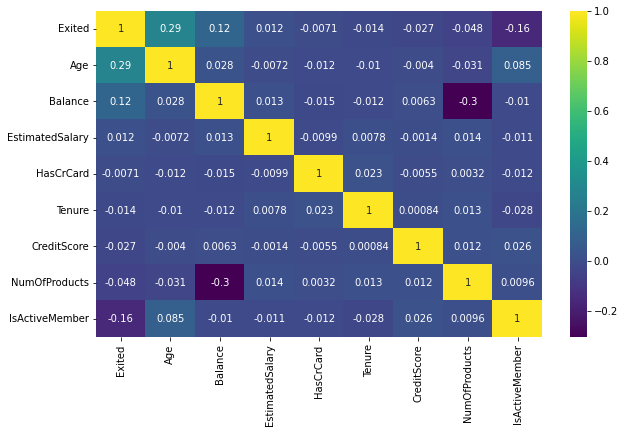

In [50]:
k = 10
cols = df.corr().nlargest(k, 'Exited')['Exited'].index
cm = df[cols].corr()
plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, cmap = 'viridis')

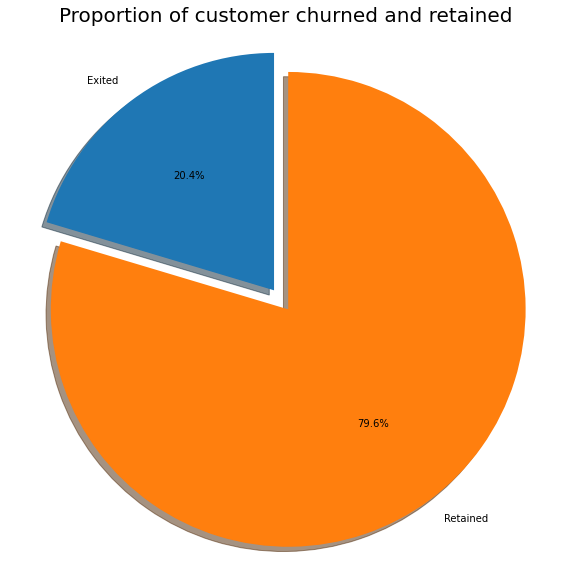

In [8]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited'] == 1].count(), df.Exited[df['Exited'] == 0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize = (10, 10))
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.title('Proportion of customer churned and retained', size = 20)
plt.show()

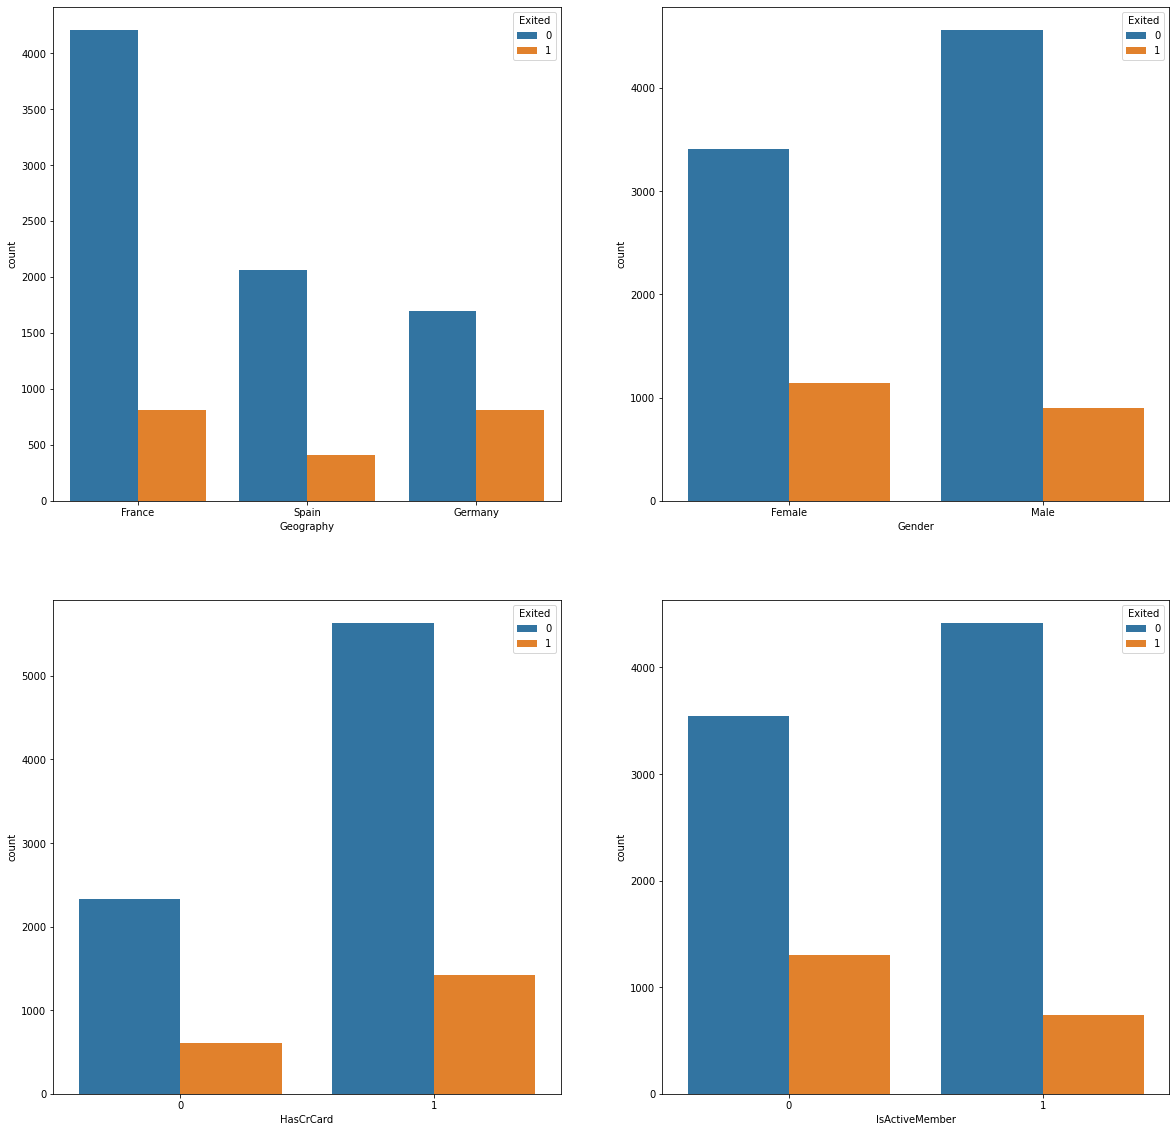

In [9]:
fig, axarr = plt.subplots(2, 2, figsize = (20, 20))
sns.countplot(x = 'Geography', hue = 'Exited', data = df, ax = axarr[0][0])
sns.countplot(x = 'Gender', hue = 'Exited', data = df, ax = axarr[0][1])
sns.countplot(x = 'HasCrCard', hue = 'Exited', data = df, ax = axarr[1][0])
sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df, ax = axarr[1][1])

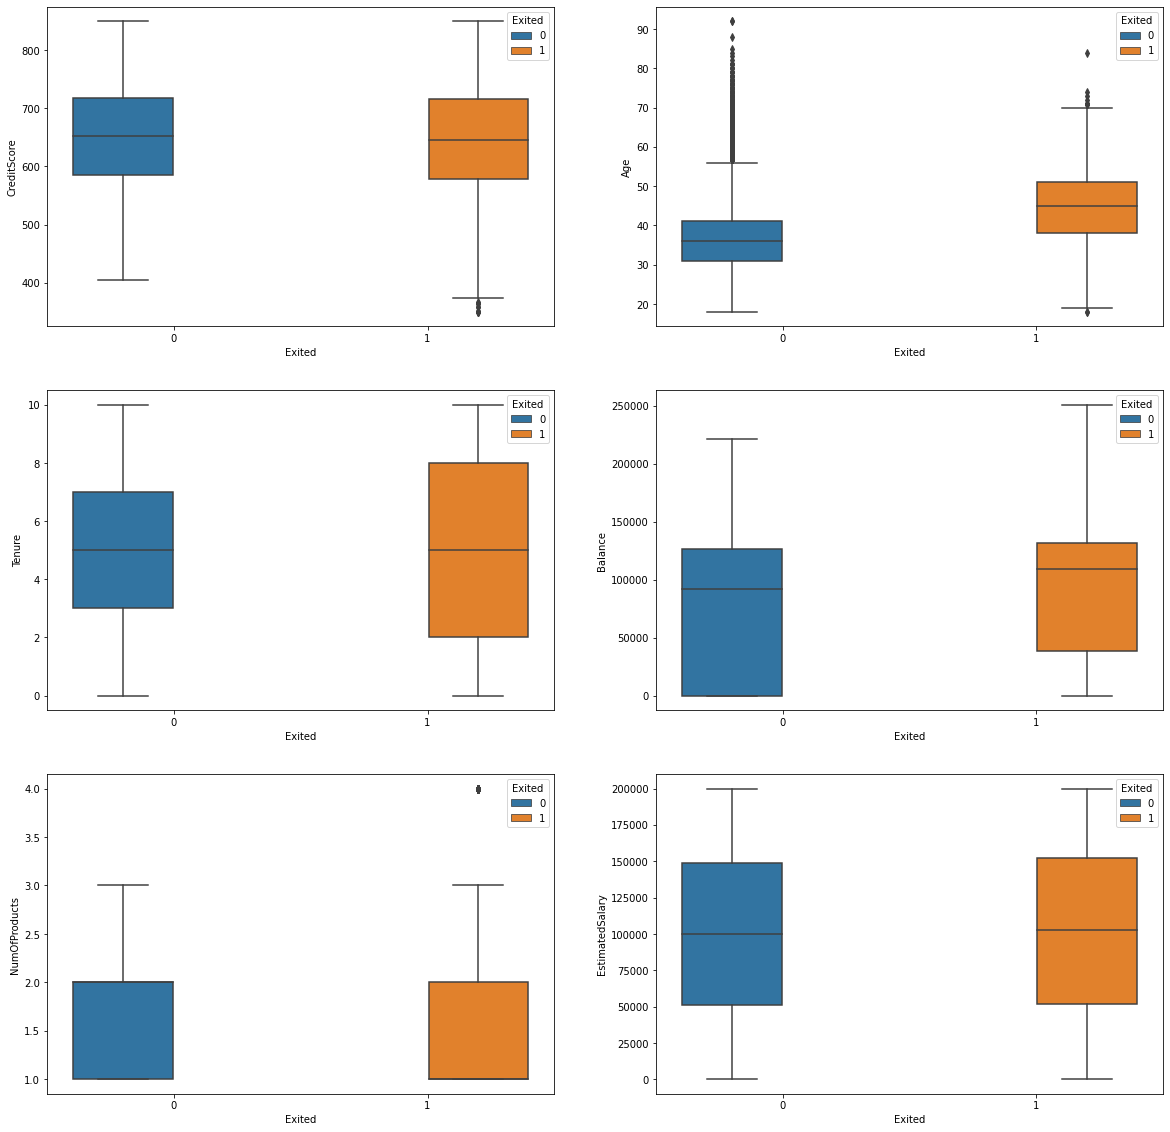

In [10]:
fig, axarr = plt.subplots(3, 2, figsize = (20, 20))
sns.boxplot(y = 'CreditScore', x = 'Exited', hue = 'Exited', data = df, ax = axarr[0][0])
sns.boxplot(y = 'Age', x = 'Exited', hue = 'Exited', data = df, ax = axarr[0][1])
sns.boxplot(y = 'Tenure', x = 'Exited', hue = 'Exited', data = df, ax = axarr[1][0])
sns.boxplot(y = 'Balance', x = 'Exited', hue = 'Exited', data = df, ax = axarr[1][1])
sns.boxplot(y = 'NumOfProducts', x = 'Exited', hue = 'Exited', data = df, ax = axarr[2][0])
sns.boxplot(y = 'EstimatedSalary', x = 'Exited', hue = 'Exited', data = df, ax = axarr[2][1])

**Feature Engineering**

In [11]:
df_train = df.sample(frac = 0.8, random_state = 200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

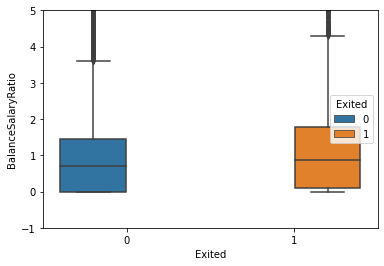

In [12]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y = 'BalanceSalaryRatio', x = 'Exited', hue = 'Exited', data = df_train)
plt.ylim(-1, 5)

**The ratio of the back balance and the estimated salary indicates that customer with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of load capital.**

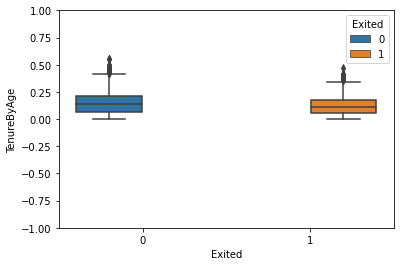

In [13]:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y = 'TenureByAge', x = 'Exited', hue = 'Exited', data = df_train)
plt.ylim(-1, 1)
plt.show()

**We introduce a variable to capture ratio of credit score and age to take into account the credit behaviour of adult life.**

In [14]:
df_train['CreditScoreGivenAge'] = df_train.CreditScore / df_train.Age

In [15]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


**Data prep for model fitting.**

In [16]:
continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',
                   'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [ ]:
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

**For the one hot variables, we change 0 to -1 so that the models can capture a negative relation where the attribute is inapplicable instead of 0**

In [17]:
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [18]:
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
  if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
    for j in df_train[i].unique():
      df_train[i + '_' + j] = np.where(df_train[i] == j, 1, -1)
    remove.append(i)
df_train = df_train.drop(remove, axis = 1)
df_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


**MinMax scaling the continuous variable**

In [19]:
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars] - minVec) / (maxVec - minVec)
df_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


**Data preparation pipeline for test data**

In [20]:
def DfPrepPipeline(df_predict, df_train_cols, minVec, maxVec):
  df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
  df_predict['TenureByAge'] = df_predict.Tenure / (df_predict.Age - 18)
  df_predict['CreditScoreGivenAge'] = df_predict.CreditScore / (df_predict.Age - 18)

  continuous_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                     'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']
  cat_vars = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']
  df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
  df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
  df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1

  lst = ['Geography', 'Gender']
  remove = list()

  for i in lst:
    for j in df_predict[i].unique():
      df_predict[i + '_' + j] = np.where(df_predict[i] == j, 1, -1)
    remove.append(i)
  df_predict = df_predict.drop(remove, axis = 1)

  L = list(set(df_train_cols) - set(df_predict.columns))
  for l in L:
    df_predict[str(l)] = -1

  df_predict[continuous_vars] = (df_predict[continuous_vars] - minVec) / (maxVec - minVec)

  df_predict = df_predict[df_train_cols]
  return df_predict

In [21]:
#support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

#fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

**Function to give best model score and parameters**

In [22]:
def best_model(model):
  print(model.best_score_)
  print(model.best_params_)
  print(model.best_estimator_)

def get_auc_scores(y_actual, method, method2):
  auc_score = roc_auc_score(y_actual, method)
  fpr_df, tpr_df, _ = roc_curve(y_actual, method2)
  return auc_score, fpr_df, tpr_df

**Fit primal logistic regression**

In [23]:
log_primal = LogisticRegression(C = 100, class_weight = None,
                                dual = False, fit_intercept = True,
                                intercept_scaling = 1, max_iter = 250,
                                multi_class = 'multinomial', n_jobs = None,
                                penalty = 'l2', random_state = None, solver = 'lbfgs',
                                tol = 1e-05, verbose = 0, warm_start = False)
log_primal.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)

LogisticRegression(C=100, max_iter=250, multi_class='multinomial', tol=1e-05)

In [24]:
print(classification_report(df_train.Exited, log_primal.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6353
           1       0.64      0.24      0.35      1647

    accuracy                           0.82      8000
   macro avg       0.73      0.60      0.62      8000
weighted avg       0.79      0.82      0.78      8000



**Fit SVM with RBF Kernel**

In [27]:
from sklearn.svm import SVC
svm_rbf = SVC(C = 100, cache_size = 200, class_weight = None, coef0 = 0.0, decision_function_shape = 'ovr',
              degree = 3, gamma = 0.1, kernel = 'rbf', max_iter = -1, probability = True, random_state = None,
              shrinking = True, tol = 0.001, verbose = False)
svm_rbf.fit(df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [28]:
print(classification_report(df_train.Exited,  svm_rbf.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.85      0.40      0.54      1647

    accuracy                           0.86      8000
   macro avg       0.86      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



**References**

https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/notebook

https://www.kaggle.com/code/simgeerek/churn-prediction-using-machine-learning